# Framingham Heart Study
- The study had included cardiovascular diseases risk factors such as:
  - Blood pressure 
  - Smoking history 
  - Health measurements
  - Medication use

- The incidence/outcome are measured and recorded in the dataset:
   - 10 year risk of CHD

## Project Objectives
1. Data Cleaning
   - Examine for missing data
   - Examine Outlier

2. Conduct Exploratory Data Analysis
   - Explore the relationship between each of the risk factors with the respective outcomes observed 
   - Comparing data from Day 0 to Last period of measure to see if there's any outcome difference

3. Conduct Regression Analysis
   - Determine what type of regression analysis to be conducted. 

4. Creating a ML model using the train dataset
   - Create model based on variables examine to be correlated
   - Fine tune model 
   - Determine if dataset needs to be balanced 
  * https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0#9eeb
  
5. Testing model to determine accuracy of model from train dateset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##Viewing Dataset

In [5]:
df = pd.read_csv('D:\Dropbox\PythonProjects\pythonprojects\Heart Study (Cohort)\subset.txt') #on windows
# df = pd.read_csv('/Users/mba/Desktop/pythonprojects/Heart Study (Cohort)/subset.txt') #on mac


df.info()
df.columns
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
%matplotlib inline
genderpairs= sns.pairplot(df, hue="male")
genderpairs

In [ ]:
%matplotlib inline
pairs= sns.pairplot(df)
pairs.map_lower(sns.kdeplot, levels=4, color=".2")

In [8]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


## Imputing Dataset
Missing Data are found in the following variables: education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose

- When grouped by Age - totChol, BMI, cigsPday and glucose have correlation. We will be imputing the values by taking the median of the data that is grouped by age for the missing values of, totChol BMI and Glucose. This might not be the best method of imputable and should be explored further in the future to determine the best method in imputing data. 
- For cigsPday median will have addtional gender variable added as it is observed that the gender has an influence in the number of cigpday.
- For heart rate - sysBP seems to have some relationship. The median of the HR will be imputed based on the sysBP.
- Education and BPmeds doesn't not exhibit any correlation with any variables and are hard to impute without the risk of producing unrelated data. Thus these observations will be dropped from the dataset.


In [6]:
def imputemedian(x):
    return x.fillna(x.median())

In [7]:
## Imputing and Removing Outliers
dft = df.copy()

agegroup = dft.groupby(['age'])
genderagegroup = dft.groupby(['male','age'])
bpgroup = dft.groupby(['sysBP'])

dft.totChol = agegroup['totChol'].transform(imputemedian)
dft.glucose = agegroup['glucose'].transform(imputemedian)
dft.BMI = agegroup['BMI'].transform(imputemedian)
dft.cigsPerDay = genderagegroup['cigsPerDay'].transform(imputemedian)
dft.heartRate = bpgroup['heartRate'].transform(imputemedian)

dft.dropna(inplace=True)
dft.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
##Looking for Outliers in continuous data
%matplotlib inline
dftcont = dft[['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

fig, ax = plt.subplots(ncols=1, nrows=7, figsize = (12,12), constrained_layout=True)

for x in range(len(dftcont.columns)):

    ax= plt.subplot(7,1, x+1)
    plt.boxplot(dftcont.iloc[:,x], vert=False)
    ax.set_title(dftcont.columns[x])
    
plt.show() 


Based on the boxplot an extreme value of 600 was observed for totChol and that may not help to represent the population and will manipulate the overall distribution and mean of the data hence that observation will also be dropped from the analysis.

In [8]:
#Spliting data set into train and test set
x_train, x_test, y_train, y_test = train_test_split(dft.iloc[:,:-1], dft.iloc[:,-1], test_size=0.33, random_state=42)


x_train_cont = x_train[['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]


In [ ]:
%matplotlib inline
sns.pairplot(x_train_cont)

In [ ]:
mask = np.zeros_like(dftcont.corr())
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(constrained_layout=True)

with sns.axes_style('white'):
        f, ax = plt.subplots(figsize=(7,5))
        ax = sns.heatmap(dftcont.corr(), mask=mask, vmax =.3, square = True, cmap= sns.diverging_palette(10,220, as_cmap=True))
        plt.title("Correlation Matrix Heatmap for Continuous Variable")
        plt.show() 

In [9]:
## Cheking for Normality
import pingouin as pg

print(pg.normality(np.log((x_train_cont.cigsPerDay)+1), method='normaltest'))
print(pg.normality(x_train_cont.iloc[:,0:], method='normaltest'))

                       W  pval  normal
cigsPerDay  12394.183745   0.0   False
                      W           pval  normal
cigsPerDay   491.124128  2.258139e-107   False
totChol      144.505856   4.177843e-32   False
sysBP        496.578844  1.476638e-108   False
diaBP        269.623546   2.831333e-59   False
BMI          511.001027  1.090277e-111   False
heartRate    221.334738   8.665076e-49   False
glucose     3258.909915   0.000000e+00   False


In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734 entries, 1819 to 3300
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             2734 non-null   int64  
 1   age              2734 non-null   int64  
 2   education        2734 non-null   float64
 3   currentSmoker    2734 non-null   int64  
 4   cigsPerDay       2734 non-null   float64
 5   BPMeds           2734 non-null   float64
 6   prevalentStroke  2734 non-null   int64  
 7   prevalentHyp     2734 non-null   int64  
 8   diabetes         2734 non-null   int64  
 9   totChol          2734 non-null   float64
 10  sysBP            2734 non-null   float64
 11  diaBP            2734 non-null   float64
 12  BMI              2734 non-null   float64
 13  heartRate        2734 non-null   float64
 14  glucose          2734 non-null   float64
dtypes: float64(9), int64(6)
memory usage: 341.8 KB


As observed by Shapiro normality test, the variables does not have a normal distribution.  

In [10]:
## Chi-Sq test on Gender Vs TenYearCHD           
chisqtest= pd.concat([x_train.loc[:,('male', 'BPMeds', 'prevalentStroke', 'prevalentHyp','diabetes')], y_train], axis=1)
chisqtest
pg.chi2_independence(data= chisqtest, x='male', y='TenYearCHD')
pg.chi2_independence(data= chisqtest, x='male', y='prevalentStroke')
pg.chi2_independence(data= chisqtest, x='male', y='prevalentHyp')


(prevalentHyp            0           1
 male                                 
 0             1062.986467  502.013533
 1              794.013533  374.986467,
 prevalentHyp       0      1
 male                       
 0             1063.5  501.5
 1              793.5  375.5,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  0.001809  1.0  0.966076  0.000813  0.050207
 1        cressie-read  0.666667  0.001809  1.0  0.966076  0.000813  0.050207
 2      log-likelihood  0.000000  0.001809  1.0  0.966077  0.000813  0.050207
 3       freeman-tukey -0.500000  0.001809  1.0  0.966078  0.000813  0.050207
 4  mod-log-likelihood -1.000000  0.001809  1.0  0.966078  0.000813  0.050207
 5              neyman -2.000000  0.001808  1.0  0.966079  0.000813  0.050207)

In [11]:
pg.mwu(x_train.male, y_train)

,U-val,alternative,p-val,RBC,CLES
MWU,4780399.0,two-sided,6.715785e-115,-0.279078,0.639539


In [20]:
## Regression Analysis
lg = pg.logistic_regression(x_train,y_train)
lg.round(2)

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-7.25,0.83,-8.71,0.00,-8.88,-5.62
1,male,0.33,0.13,2.58,0.01,0.08,0.58
2,age,0.07,0.01,8.90,0.00,0.06,0.09
3,education,-0.10,0.06,-1.59,0.11,-0.21,0.02
4,currentSmoker,-0.11,0.19,-0.62,0.54,-0.48,0.25
5,cigsPerDay,0.03,0.01,3.82,0.00,0.01,0.04
6,BPMeds,0.34,0.26,1.30,0.19,-0.17,0.85
7,prevalentStroke,1.06,0.53,2.01,0.04,0.03,2.09
8,prevalentHyp,0.46,0.16,2.84,0.00,0.14,0.77
9,diabetes,0.22,0.36,0.61,0.54,-0.49,0.93


In [14]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score


In [15]:
#Creating model and creating prediction
logmodel = lr(solver='liblinear')
logmodel.fit(x_train, y_train)

logpred = logmodel.predict(x_train)
logpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
#Log Reg Eval
%matplotlib inline

def logmartixscore(x_train, y_train, x_test, y_test, logmodel, logpred):
    '''
    This functions creates accuracy score along with cross validation score and confusion matrix
    imput required for this function are 
    '''
    print( 'Accuracy Score:', accuracy_score(y_train,logpred))
    print ('Cross Validation Score:', cross_val_score(logmodel,x_train,y_train,cv=5).mean())
    print(classification_report(y_train,logpred))
    
    sns.heatmap(confusion_matrix(y_train, logpred), annot=True, cmap='Greys', fmt='d')

Accuracy Score: 0.8569861009509876
Cross Validation Score: 0.8522316196904862
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2328
           1       0.69      0.07      0.12       406

    accuracy                           0.86      2734
   macro avg       0.78      0.53      0.52      2734
weighted avg       0.83      0.86      0.80      2734



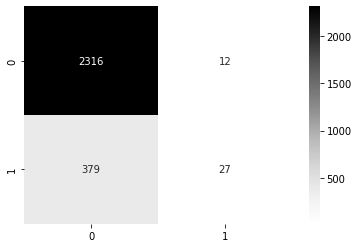

In [17]:
logmartixscore(x_train=x_train, y_train= y_train, x_test=x_test, y_test= y_test, logmodel= logmodel, logpred= logpred)

In [1]:
## Exploring Regression with statsmodels package
import statsmodels.api as sm

In [36]:
statsmodel= sm.Logit(y_train, sm.add_constant(x_train)).fit()

Optimization terminated successfully.
         Current function value: 0.371405
         Iterations 7


In [37]:
statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2734
Model:                          Logit   Df Residuals:                     2718
Method:                           MLE   Df Model:                           15
Date:                Wed, 12 Jan 2022   Pseudo R-squ.:                  0.1159
Time:                        12:00:57   Log-Likelihood:                -1015.4
converged:                       True   LL-Null:                       -1148.6
Covariance Type:            nonrobust   LLR p-value:                 5.488e-48
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.2481      0.832     -8.714      0.000      -8.878      -5.618
male                0.3271      0.127      2.581      0.010       0.079       0.575
age                 0.0706      0.008      8.900      0.000       0.055       0.086
education          -0.0955      0.060     -1.586      0.113      -0.214       0.023
currentSmoker      -0.1138      0.185     -0.615      0.539      -0.476       0.249
cigsPerDay          0.0280      0.007      3.825      0.000       0.014       0.042
BPMeds              0.3394      0.261      1.298      0.194      -0.173       0.852
prevalentStroke     1.0580      0.526      2.011      0.044       0.027       2.089
prevalentHyp        0.4566      0.161      2.836      0.005       0.141       0.772
diabetes            0.2218      0.363      0.611      0.541      -0.489       0.933
totChol            -0.0006      0.001     -0.433      0.665      -0.003       0.002
sysBP               0.0064      0.004      1.451      0.147      -0.002       0.015
diaBP               0.0035      0.007      0.472      0.637      -0.011       0.018
BMI                -0.0021      0.015     -0.143      0.887      -0.031       0.027
heartRate          -0.0010      0.005     -0.196      0.845      -0.011       0.009
glucose             0.0066      0.003      2.425      0.015       0.001       0.012
===================================================================================
"""

In [51]:
#Statsmodel and prediction

statsmodelpred= statsmodel.predict(sm.add_constant(x_train)).round()

statsmodelpred

1819    0.0
2415    0.0
1413    0.0
2744    0.0
364     0.0
       ... 
1178    0.0
1353    0.0
891     0.0
3645    0.0
3300    0.0
Length: 2734, dtype: float64

0.8584491587417703
AxesSubplot(0.125,0.125;0.62x0.755)


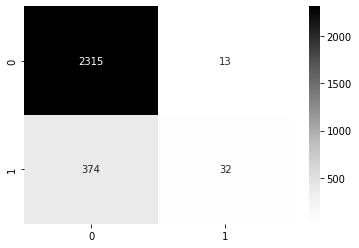

In [59]:
print(accuracy_score(y_train, statsmodelpred))
print(sns.heatmap(confusion_matrix(y_train, statsmodelpred), annot=True, cmap='Greys', fmt='d'))

## Evaluating Classification Ratio